In [14]:
import pandas as pd
import numpy as np
!pip3 install xlrd
from datetime import datetime

data = pd.read_excel("Fashion.xlsx")
# data.columns = data.iloc[0]
data.drop([data.index[0]], inplace=True)

data.reset_index(drop=True, inplace=True)
data.reset_index(inplace=True)
data = data.sort_values(by = 'timestamp')
data.rename(columns = {'index':"order_id"}, inplace=True)
data["InvoiceDate"] = data["timestamp"].dt.date
data

,order_id,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,City,Country_Province,User_Birthday,Country,Revenue,InvoiceDate
3382,3382,2017-10-01 00:00:23,2888,1.152.111.1,Classic Mini Backpack,AD660AC16AVJ,1,female,paypal@braintree,1,nlsskf2TXu,Epping,VIC,NaT,AU,45.45,2017-10-01
32525,32525,2017-10-01 00:02:32,28705,123.2.191.66,"The Perfect Tee,Hotter Than Ever Tee,All-Over ...","LE893AA31QUE,MI202AA29HAK,AD660AA70ZWF,AT049AA...",0,female,pbi@afterpay,"1,1,1,1",NaN,Spotswood,VIC,NaT,AU,168.07,2017-10-01
23325,23325,2017-10-01 00:04:45,20505,122.62.139.174,Sammy Scallop Hem Top,AT049AA68FBV,0,male,cc@braintree,1,NaN,Northcote,VIC,NaT,NZ,54.50,2017-10-01
10213,10213,2017-10-01 00:06:34,8896,115.69.166.219,Kanken,FJ806AC13CNU,0,female,cc@braintree,1,NaN,Newtown,NaN,NaT,NZ,118.14,2017-10-01
8006,8006,2017-10-01 00:07:04,6958,49.180.72.180,Valerie,MI906SH05HLA,0,female,paypal@braintree,1,NaN,Rosebery,NSW,NaT,AU,140.00,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5557,5557,2017-10-21 23:58:18,4845,121.222.153.126,HENRY,SA682SH85FSO,1,female,pbi@afterpay,1,NaN,Cooroy,QLD,1980-01-25,AU,127.23,2017-10-21
119,119,2017-10-21 23:58:40,0,124.197.29.205,Autumn Hues Flora Dress,DO894AA51PQM,0,female,cc@braintree,1,NaN,Auckland,NaN,NaT,NZ,54.50,2017-10-21
25715,25715,2017-10-21 23:58:58,22655,120.145.4.137,"Womens Jyll Sandal,Birch","RO024SH96RKX,WI065SH85SPE",0,female,paypal@braintree,"1,1",NaN,NaN,NaN,NaT,AU,127.21,2017-10-21
40577,40577,2017-10-21 23:58:59,35787,60.240.83.44,"Sonia Stripe Tee,2750 Cotu Classic,2790 Linea,...","CM638AA37AAK,SU138SH36GXN,SU138SH25WEW,MA187AA...",0,female,pbi@afterpay,"1,1,1,1,1",NaN,Southport,QLD,1989-09-15,AU,443.49,2017-10-21


In [17]:
data["total_prod"] = 0
for index, row in data.iterrows():
    try:
        data.loc[index,"Revenue"] = float(row["Revenue"])
    except:
        data.loc[index,"Revenue"] = int(000)
    if isinstance(row['Number_of_Products'], int):
        data.loc[index,"total_prod"] = row['Number_of_Products']
    else:
        s = 0
        for i in row['Number_of_Products'].split(','):
            try:
                s = s + int(i.encode("ascii"))
            except:
                s = s + int(i)
        data.loc[index,"total_prod"] = s


data

,order_id,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,City,Country_Province,User_Birthday,Country,Revenue,InvoiceDate,total_prod
3382,3382,2017-10-01 00:00:23,2888,1.152.111.1,Classic Mini Backpack,AD660AC16AVJ,1,female,paypal@braintree,1,nlsskf2TXu,Epping,VIC,NaT,AU,45.45,2017-10-01,1
32525,32525,2017-10-01 00:02:32,28705,123.2.191.66,"The Perfect Tee,Hotter Than Ever Tee,All-Over ...","LE893AA31QUE,MI202AA29HAK,AD660AA70ZWF,AT049AA...",0,female,pbi@afterpay,"1,1,1,1",NaN,Spotswood,VIC,NaT,AU,168.07,2017-10-01,4
23325,23325,2017-10-01 00:04:45,20505,122.62.139.174,Sammy Scallop Hem Top,AT049AA68FBV,0,male,cc@braintree,1,NaN,Northcote,VIC,NaT,NZ,54.50,2017-10-01,1
10213,10213,2017-10-01 00:06:34,8896,115.69.166.219,Kanken,FJ806AC13CNU,0,female,cc@braintree,1,NaN,Newtown,NaN,NaT,NZ,118.14,2017-10-01,1
8006,8006,2017-10-01 00:07:04,6958,49.180.72.180,Valerie,MI906SH05HLA,0,female,paypal@braintree,1,NaN,Rosebery,NSW,NaT,AU,140.00,2017-10-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5557,5557,2017-10-21 23:58:18,4845,121.222.153.126,HENRY,SA682SH85FSO,1,female,pbi@afterpay,1,NaN,Cooroy,QLD,1980-01-25,AU,127.23,2017-10-21,1
119,119,2017-10-21 23:58:40,0,124.197.29.205,Autumn Hues Flora Dress,DO894AA51PQM,0,female,cc@braintree,1,NaN,Auckland,NaN,NaT,NZ,54.50,2017-10-21,1
25715,25715,2017-10-21 23:58:58,22655,120.145.4.137,"Womens Jyll Sandal,Birch","RO024SH96RKX,WI065SH85SPE",0,female,paypal@braintree,"1,1",NaN,NaN,NaN,NaT,AU,127.21,2017-10-21,2
40577,40577,2017-10-21 23:58:59,35787,60.240.83.44,"Sonia Stripe Tee,2750 Cotu Classic,2790 Linea,...","CM638AA37AAK,SU138SH36GXN,SU138SH25WEW,MA187AA...",0,female,pbi@afterpay,"1,1,1,1,1",NaN,Southport,QLD,1989-09-15,AU,443.49,2017-10-21,5


In [21]:
import datetime
snapshot_date = max(data.InvoiceDate) + datetime.timedelta(days=1)

df = data.groupby(['user ID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'total_prod': 'count',
    'Revenue': 'sum'})

# Rename columns
df.rename(columns = {'InvoiceDate': 'R',
                            'total_prod': 'F',
                            'Revenue': 'M'}, inplace=True)

df

,R,F,M
user ID,,,
0,1,120,18250.94
1,19,1,113.55
2,8,1,81.78
3,18,1,63.63
4,14,1,81.77
...,...,...,...
44099,11,2,162.68
44100,4,1,30.87
44101,20,1,236.36


In [22]:
from scipy import stats

df_fixed = pd.DataFrame()
df_fixed["Recency"] = stats.boxcox(df['R'])[0]
df_fixed["Frequency"] = stats.boxcox(df['F'])[0]
df_fixed["MValue"] = pd.Series(np.cbrt(df['M'])).values
df_fixed

,Recency,Frequency,MValue
0,0.000000,0.078010,26.328639
1,11.193941,0.000000,4.842419
2,5.128366,0.000000,4.340593
3,10.685648,0.000000,3.992277
4,8.581349,0.000000,4.340416
...,...,...,...
44084,6.910224,0.077999,5.458979
44085,2.473951,0.000000,3.136983
44086,11.696063,0.000000,6.182887
44087,4.501558,0.000000,6.359428


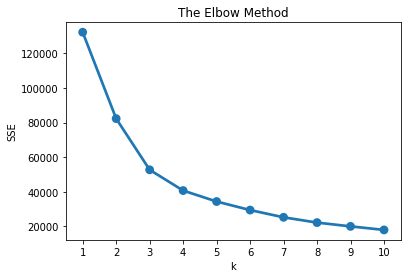

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
scaler.fit(df_fixed)
df_norm = scaler.transform(df_fixed)

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_norm)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

# k=4

In [30]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df_norm)
model.labels_.shape

df["Cluster"] = model.labels_
df.groupby('Cluster').agg({
    'R':'mean',
    'F':'mean',
    'M':['mean', 'count']}).round(2)

R     F       M       
          mean  mean    mean  count
Cluster                            
0        15.50  1.00   75.96  17359
1         4.99  1.00  111.93  13914
2        13.64  1.00  282.99   8516
3         8.92  2.37  328.77   4300

<AxesSubplot:xlabel='Attribute', ylabel='Value'>

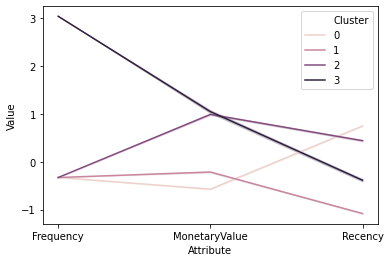

In [31]:
# Create the dataframe
df_normalized = pd.DataFrame(df_norm, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = df.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)